# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load dataset from healthcare_dataset
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [5]:
# check missing values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [7]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


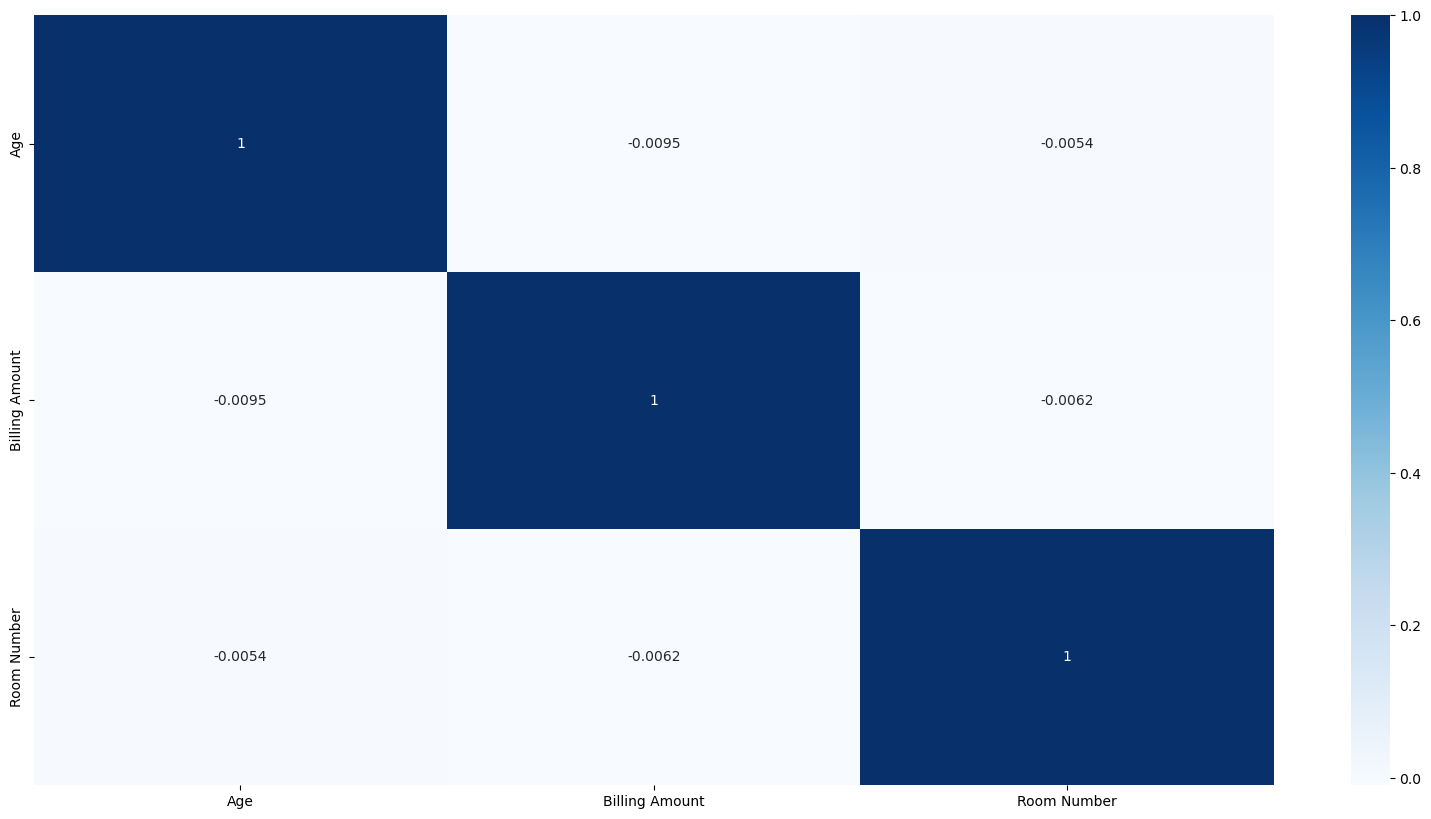

In [9]:
numericDF = df.select_dtypes(include=[np.number])

# correlation using heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(numericDF.corr(), annot=True, cmap='Blues')
plt.show()

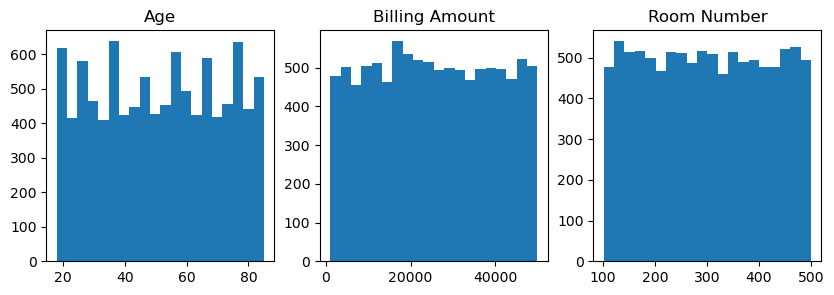

In [10]:
# distribute of numerical data
fig, axis = plt.subplots(1, len(numericDF.columns), figsize=(10,3))

for i, col_name in enumerate(numericDF.columns):
    axis[i].hist(numericDF[col_name], bins=20)
    axis[i].set_title(col_name)

plt.show()

In [11]:
# extract admission day, month and year
df['Admission Day'] = df['Date of Admission'].dt.weekday
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

# extract discharge day, month and year
df['Discharge Day'] = df['Discharge Date'].dt.weekday
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

# calculate total days
df['Total Days'] = df['Discharge Date'] - df['Date of Admission']
df['Total Days'] = df['Total Days'].dt.days

df.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Total Days
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,3,11,2022,3,12,2022,14
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,3,6,2023,3,6,2023,14
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,2,1,2019,4,2,2019,30
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,5,5,2020,6,5,2020,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,4,7,2021,0,8,2021,24


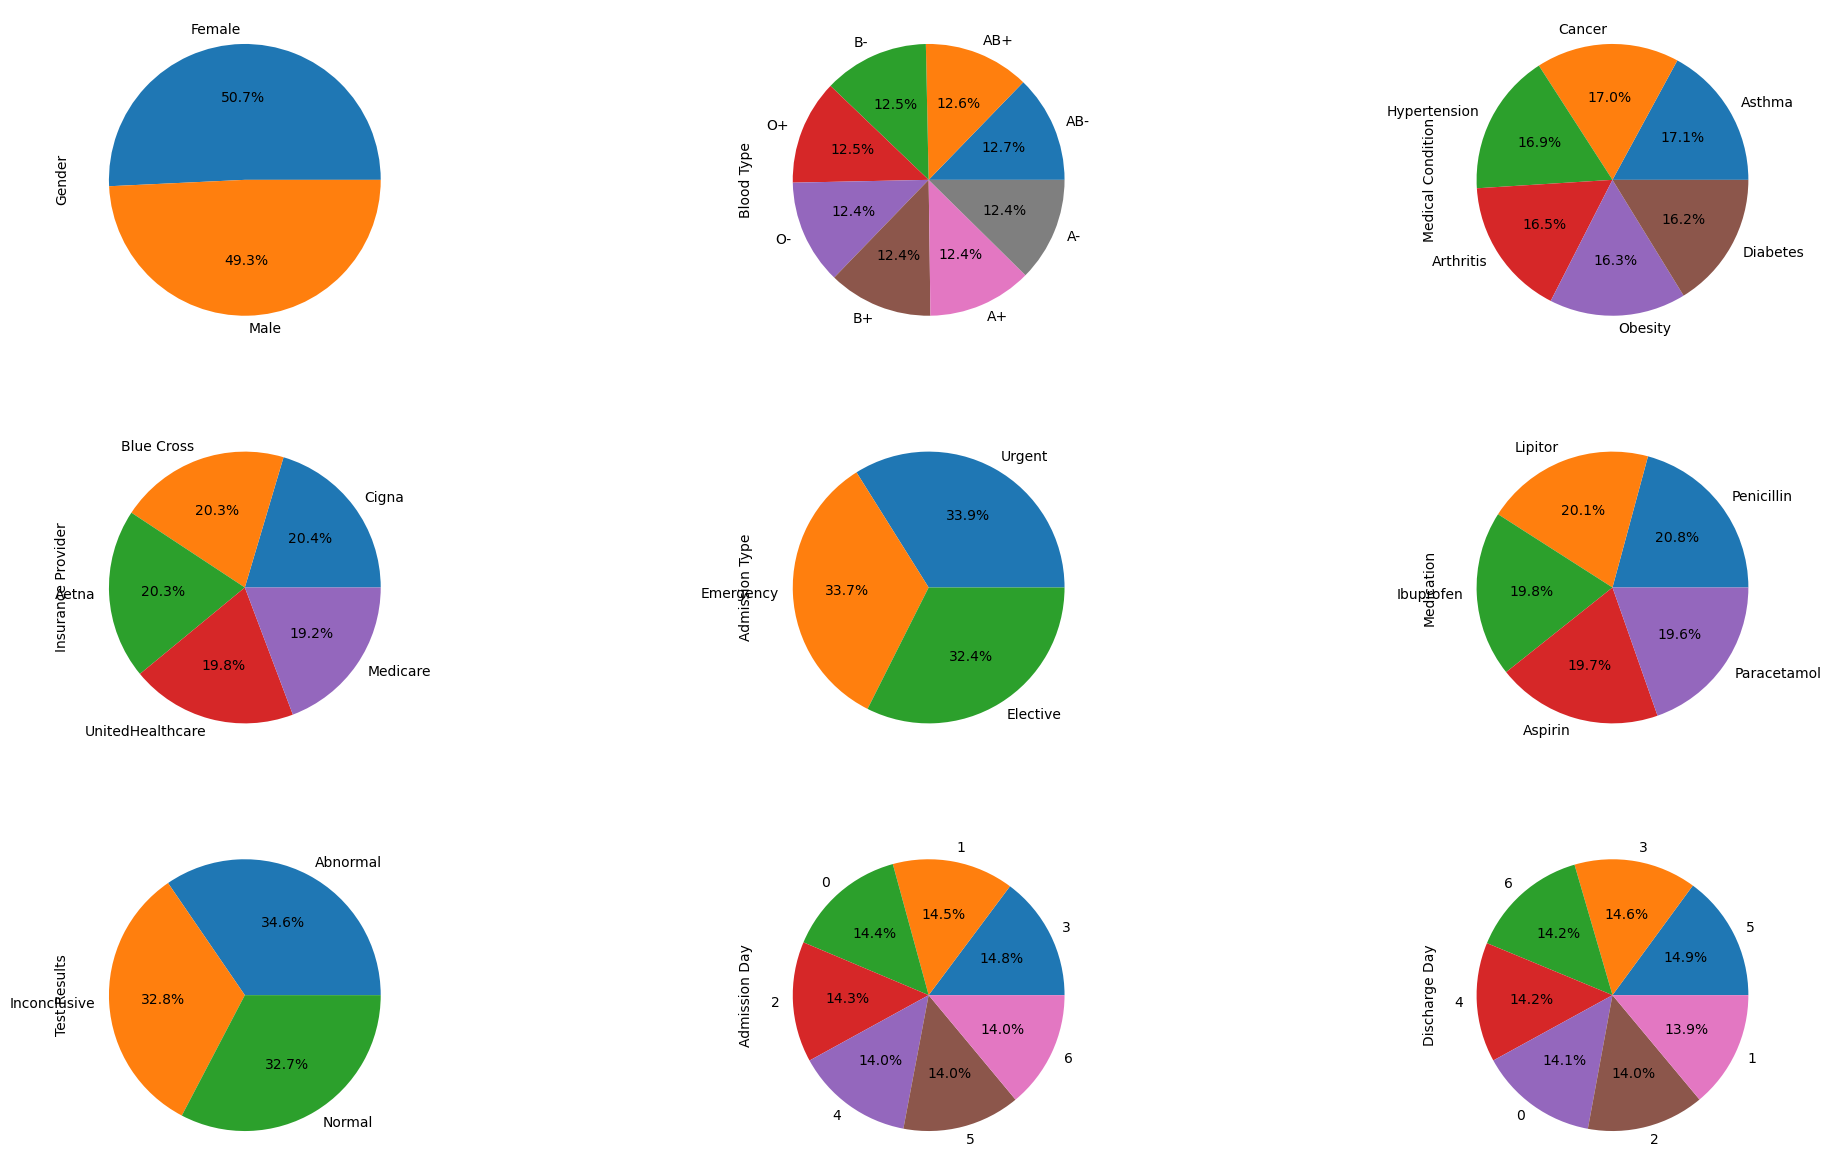

In [12]:
# visualization of gender, blood type, medical condition, insurance provider, admission type, medication, test results, admission day and discharge day
columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Admission Day', 'Discharge Day']

fig, axis = plt.subplots((len(columns) + 2) // 3, 3, figsize=(25, 15))

for i, col_name in enumerate(columns):
    df[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axis[i // 3, i % 3])
    axis[i // 3, i % 3].set_title(col_name)
    axis[i // 3, i % 3].set_title('')

plt.show()

In [13]:
lEncoder = LabelEncoder()
categoryCol = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

# encode for clustering
dfEncoded = df.copy()

# drop Name column
dfEncoded.drop(['Name'], axis=1, inplace=True)

for col in categoryCol:
    dfEncoded[col] = lEncoder.fit_transform(dfEncoded[col])

dfEncoded.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Total Days
0,81,0,7,3,7167,7960,3,37490.983364,146,0,0,1,3,11,2022,3,12,2022,14
1,35,1,6,1,2597,978,4,47304.064845,404,1,2,2,3,6,2023,3,6,2023,14
2,61,1,5,5,7180,7996,3,36874.896997,292,1,2,2,2,1,2019,4,2,2019,30
3,49,1,5,1,1169,2482,3,23303.322092,480,2,4,0,5,5,2020,6,5,2020,1
4,51,1,7,0,2775,3908,4,18086.344184,477,2,3,2,4,7,2021,0,8,2021,24


In [14]:
# scale numeric data
scaler = StandardScaler()
scaler.fit(dfEncoded)

dfScaled = pd.DataFrame(scaler.transform(dfEncoded), columns=dfEncoded.columns, index=dfEncoded.index)
dfScaled.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Total Days
0,1.508465,-0.985111,1.530606,0.301166,0.904522,1.444261,0.721952,0.851249,-1.330585,-1.246353,-1.424595,0.023057,0.012590,1.298232,0.807912,-0.013069,1.585102,0.784819,-0.181360
1,-0.839912,1.015114,1.093153,-0.874117,-0.779699,-1.348605,1.429679,1.548866,0.897390,-0.018298,-0.014663,1.242984,0.012590,-0.151950,1.500448,-0.013069,-0.153902,1.482994,-0.181360
2,0.487431,1.015114,0.655699,1.476449,0.909313,1.458661,0.721952,0.807452,-0.069793,-0.018298,-0.014663,1.242984,-0.489001,-1.602132,-1.269695,0.487656,-1.313237,-1.309707,1.676598
3,-0.125189,1.015114,0.655699,-0.874117,-1.305972,-0.746991,0.721952,-0.157358,1.553693,1.209757,1.395268,-1.196870,1.015771,-0.441986,-0.577159,1.489107,-0.443736,-0.611532,-1.690950
4,-0.023086,1.015114,1.530606,-1.461758,-0.714099,-0.176577,1.429679,-0.528235,1.527786,1.209757,0.690302,1.242984,0.514181,0.138086,0.115376,-1.515245,0.425766,0.086644,0.979864


/Users/Shared/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Shared/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Shared/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Shared/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

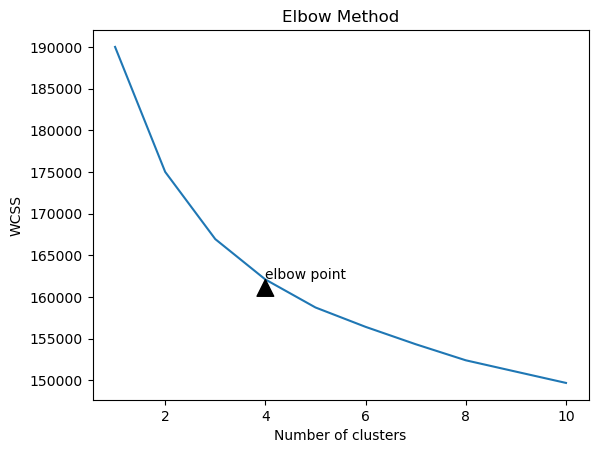

In [21]:
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(dfScaled)
    WCSS.append(kmeans.inertia_)

kneed = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
elbow_point = kneed.knee

plt.figure()
plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.annotate('elbow point', xy=(elbow_point, WCSS[elbow_point-1]), xytext=(elbow_point, WCSS[elbow_point-1] + 100), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [22]:
agglomerative = AgglomerativeClustering(n_clusters=elbow_point, metric='euclidean', linkage='ward')
labels = agglomerative.fit_predict(dfScaled)
df['Cluster'] = labels
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,...,Medication,Test Results,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Total Days,Cluster
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,...,Aspirin,Inconclusive,3,11,2022,3,12,2022,14,1
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,...,Lipitor,Normal,3,6,2023,3,6,2023,14,1
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,...,Lipitor,Normal,2,1,2019,4,2,2019,30,0
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,...,Penicillin,Abnormal,5,5,2020,6,5,2020,1,3
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,...,Paracetamol,Normal,4,7,2021,0,8,2021,24,2


In [24]:
df.groupby('Cluster').agg(count = ('Cluster', 'count'),
                                    ageMean = ('Age', 'mean'),
                                    gender = ('Gender', pd.Series.mode),
                                    bloodType = ('Blood Type', pd.Series.mode),
                                    medicalCond = ('Medical Condition', pd.Series.mode),
                                    hospital = ('Hospital', pd.Series.mode),
                                    insuranceProv = ('Insurance Provider', pd.Series.mode),
                                    billingAmount = ('Billing Amount', 'mean'),
                                    admissionType = ('Admission Type', pd.Series.mode),
                                    medication = ('Medication', pd.Series.mode),
                                    testResults = ('Test Results', pd.Series.mode),
                                    totalDays = ('Total Days', 'mean'),
                                    admissionDay = ('Admission Day', pd.Series.mode),
                                    dischargeDay = ('Discharge Day', pd.Series.mode))

,count,ageMean,gender,bloodType,medicalCond,hospital,insuranceProv,billingAmount,admissionType,medication,testResults,totalDays,admissionDay,dischargeDay
Cluster,,,,,,,,,,,,,,
0,3134,52.312699,Male,A+,Cancer,Smith PLC,Cigna,25791.028035,Elective,Penicillin,Abnormal,15.719528,3,3
1,2291,51.302924,Male,O+,Diabetes,Smith and Sons,Aetna,26127.129431,Urgent,Penicillin,Normal,15.534265,0,6
2,2183,49.819056,Female,O-,Asthma,"[Johnson PLC, Jones Inc, Thomas Group]",Blue Cross,25462.693759,Urgent,Lipitor,Abnormal,15.235914,2,5
3,2392,51.958194,Female,A+,Hypertension,Smith PLC,UnitedHealthcare,24622.354479,Elective,Aspirin,Abnormal,15.678930,"[1, 2]",0


In [26]:
ohEncoder = OneHotEncoder(sparse_output=False)

categoricalColumns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']

dfOHE = df.copy()
dfOHE.drop(['Name', 'Cluster', 'Doctor', 'Hospital'], axis=1, inplace=True)

for col in categoricalColumns:
    ohe = ohEncoder.fit_transform(dfOHE[[col]])
    oheDF = pd.DataFrame(ohe, columns=ohEncoder.get_feature_names_out([col]))
    dfOHE = pd.concat([dfEncoded, oheDF], axis=1)
    dfOHE = dfOHE.drop(col, axis=1)

dfOHE['Test Results'] = lEncoder.fit_transform(dfOHE['Test Results'])
dfOHE.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,...,Admission Year,Discharge Day,Discharge Month,Discharge Year,Total Days,Medication_0,Medication_1,Medication_2,Medication_3,Medication_4
0,81,0,7,3,7167,7960,3,37490.983364,146,0,...,2022,3,12,2022,14,1.0,0.0,0.0,0.0,0.0
1,35,1,6,1,2597,978,4,47304.064845,404,1,...,2023,3,6,2023,14,0.0,0.0,1.0,0.0,0.0
2,61,1,5,5,7180,7996,3,36874.896997,292,1,...,2019,4,2,2019,30,0.0,0.0,1.0,0.0,0.0
3,49,1,5,1,1169,2482,3,23303.322092,480,2,...,2020,6,5,2020,1,0.0,0.0,0.0,0.0,1.0
4,51,1,7,0,2775,3908,4,18086.344184,477,2,...,2021,0,8,2021,24,0.0,0.0,0.0,1.0,0.0


In [27]:
x = dfOHE.drop('Test Results', axis=1).values
y = dfOHE['Test Results'].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
xgBoost = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42, objective='multi:softmax')
xgBoost.fit(xTrain, yTrain)
yPred = xgBoost.predict(xTest)

In [31]:
# print accuracy score
print('Accuracy score: ', accuracy_score(yTest, yPred))

Accuracy score:  0.327
